<a href="https://colab.research.google.com/github/SauravDakre/PredictLoanDefault/blob/master/lendingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
# raw_data = pd.read_table('/content/drive/MyDrive/datasets/bankLending/XYZCorp_LendingData.txt')
raw_data=pd.read_table('/content/drive/MyDrive/datasets/bankLending/XYZCorp_LendingData.txt',parse_dates=['issue_d'],low_memory=False)

In [ ]:
raw_data.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


# handling null values

In [ ]:
pd.set_option('display.max_rows', 75)
raw_data.isnull().sum()

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
raw_data.isnull().sum()/raw_data.shape[0]*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.776261
emp_length                      5.030673
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
pymnt_plan                      0.000000
desc                           85.769111
purpose                         0.000000
title                           0.003855
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_cr_line

In [ ]:
columns_to_be_removed=['open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util',
                       'open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m',
                       'annual_inc_joint','dti_joint','verification_status_joint','mths_since_last_major_derog','desc',
                       'mths_since_last_record']
raw_data=raw_data.drop(columns_to_be_removed,axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
imputerNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
for index, value in raw_data.isnull().sum().items():
  if(value > 0):
    if(raw_data.dtypes[index] != 'object'):
      imputerNumeric.fit(raw_data[[index]])
      raw_data[[index]] = imputerNumeric.transform(raw_data[[index]])
    else:
      raw_data[index] = raw_data[index].fillna(raw_data[index].mode()[0])


In [ ]:
raw_data.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_

columns to remove
- desc
- id
- member_id
- emp_title
- title
- zip code

In [ ]:
remove_col = ['id', 'member_id', 'emp_title', 'title', 'zip_code']

In [ ]:
raw_data=raw_data.drop(remove_col,axis=1)

In [ ]:
raw_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,n,credit_card,AZ,27.65,0.0,Jan-1985,1.0,34.149943,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,225.412882,139766.247529,32163.574526,0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,n,car,GA,1.00,0.0,Apr-1999,5.0,34.149943,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,Feb-2016,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,225.412882,139766.247529,32163.574526,1


# Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

In [ ]:
for col in raw_data:
  if raw_data.dtypes[col] == 'object':
    raw_data[col] = le.fit_transform(raw_data[col])

In [ ]:
raw_data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,1,5,24000.0,2,2011-12-01,0,1,3,27.65,0.0,263,1.0,34.149943,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,39,171.62,0,41,0.0,1.0,0,0.0,225.412882,139766.247529,32163.574526,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,10,5,30000.0,1,2011-12-01,0,0,10,1.00,0.0,41,5.0,34.149943,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,5,119.66,0,99,0.0,1.0,0,0.0,225.412882,139766.247529,32163.574526,1


In [ ]:
raw_data.shape
# print(type(raw_data.isnull().sum()))
# for index, value in raw_data.isnull().sum().items():
#   if((value > 0) and  (raw_data.dtypes[index] == 'object')) :
#     print(i, index, value, raw_data.dtypes[index])

(855969, 48)

# Remove columns with high correlation

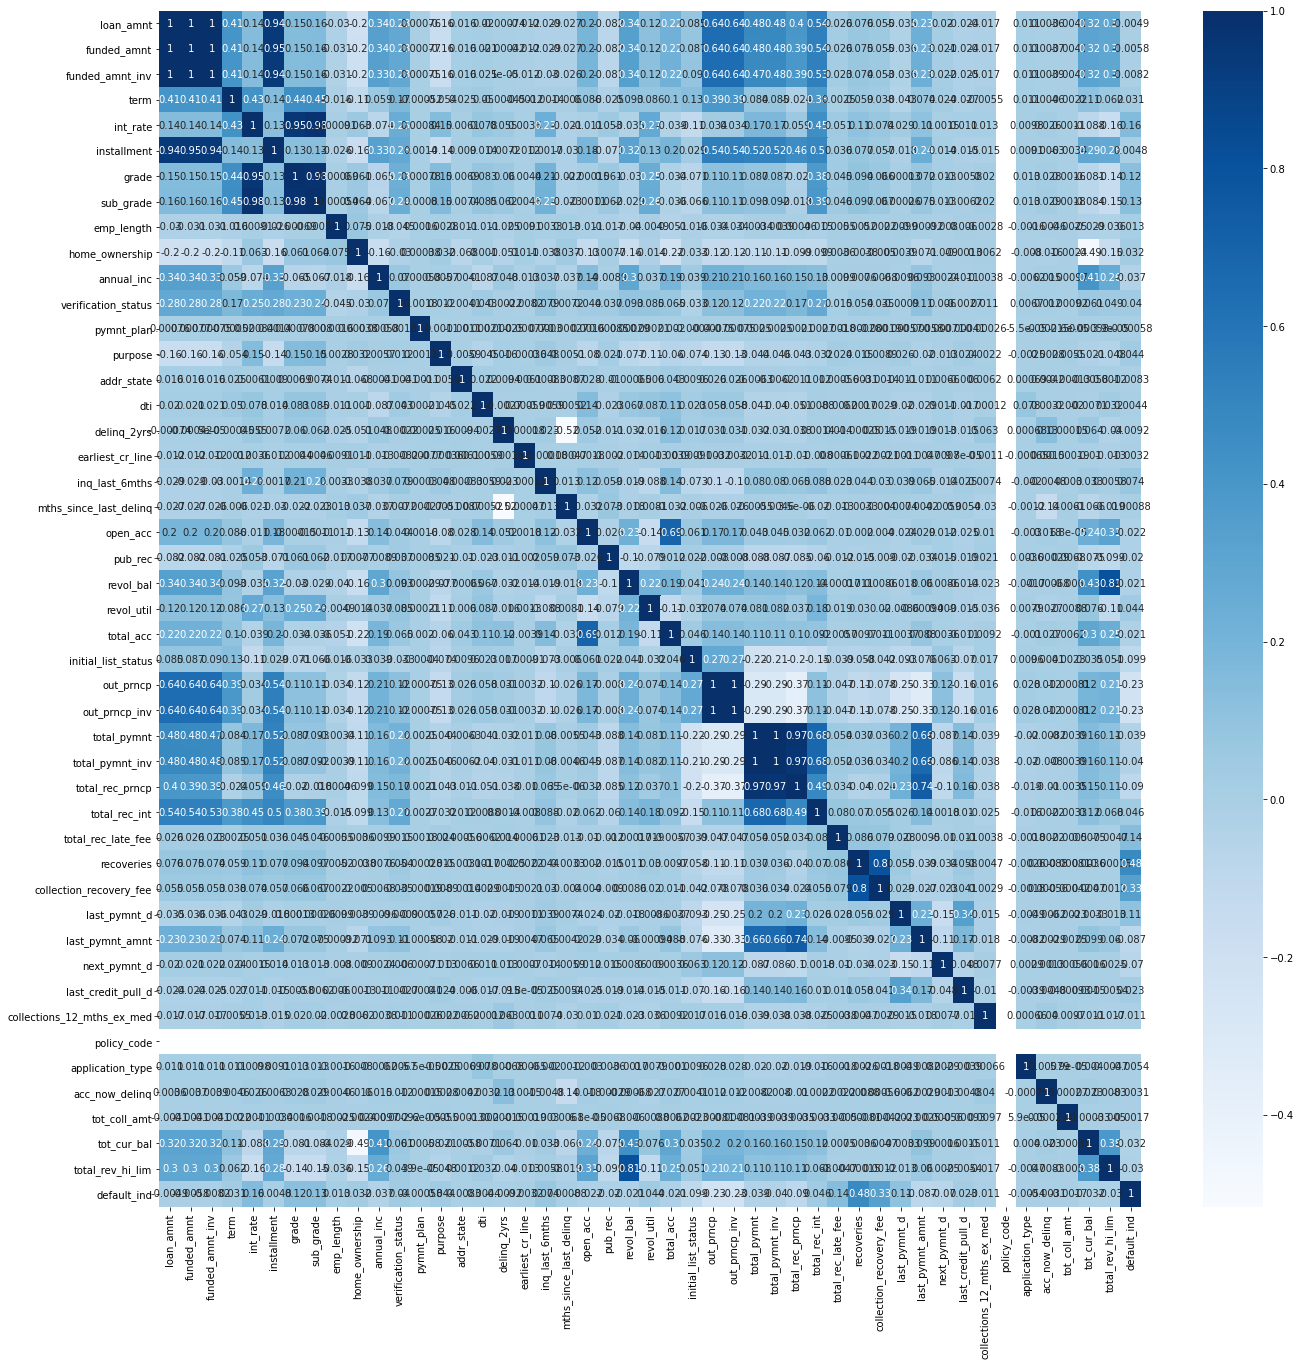

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(22,22))
cor=(raw_data[raw_data.select_dtypes(include="number").columns]).corr()
top_numeric_features=cor.index
sns.heatmap(raw_data[top_numeric_features].corr(),annot=True,cmap="Blues")

In [ ]:
# https://www.kaggle.com/learn-forum/148901
# column with high correlation will be removed
# cor
columns_to_be_removed = [
                         'funded_amnt', 'funded_amnt_inv', 'installment', 'policy_code', # correlated to loan_amnt
                         'int_rate', 'sub_grade', # correlated to grade
                         'total_rev_hi_lim', # correlated to revol_bal
                         'out_prncp_inv', # out_prncp
                         'total_pymnt_inv', 'total_rec_prncp', # total_pymnt
                         'collection_recovery_fee', # recoveries
                         'revol_bal' # total_rev_hi_lim
                         ]
raw_data=raw_data.drop(columns_to_be_removed,axis=1)

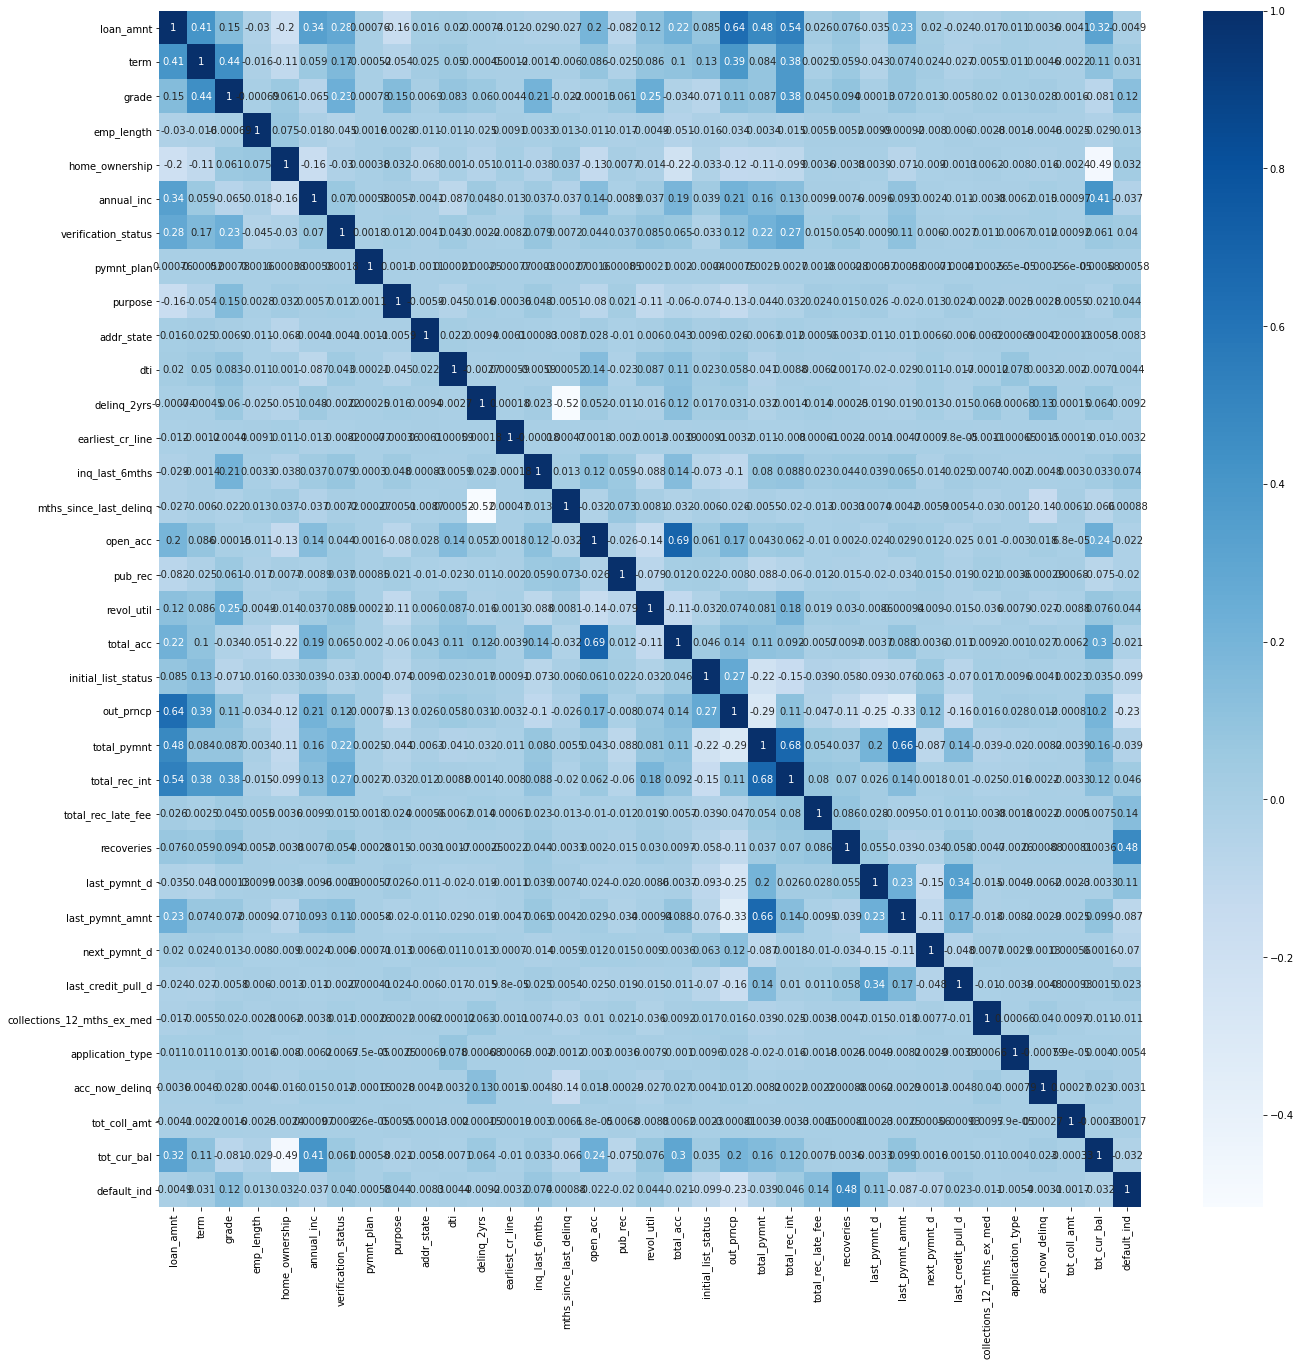

In [ ]:
plt.figure(figsize=(22,22))
cor=(raw_data[raw_data.select_dtypes(include="number").columns]).corr()
top_numeric_features=cor.index
sns.heatmap(raw_data[top_numeric_features].corr(),annot=True,cmap="Blues")

In [ ]:
cor_list=(raw_data[raw_data.select_dtypes(include="number").columns]).corr()['default_ind'][:]
cor_list

loan_amnt                    -0.004907
term                          0.031378
grade                         0.123656
emp_length                    0.013198
home_ownership                0.032341
annual_inc                   -0.037066
verification_status           0.039585
pymnt_plan                   -0.000579
purpose                       0.043574
addr_state                   -0.008272
dti                           0.004429
delinq_2yrs                  -0.009186
earliest_cr_line             -0.003240
inq_last_6mths                0.074407
mths_since_last_delinq        0.000883
open_acc                     -0.021698
pub_rec                      -0.019607
revol_util                    0.044475
total_acc                    -0.021087
initial_list_status          -0.098812
out_prncp                    -0.225960
total_pymnt                  -0.039220
total_rec_int                 0.046050
total_rec_late_fee            0.140760
recoveries                    0.475738
last_pymnt_d             

In [ ]:
correlated_with_target_var=[]
for i in range(len(cor_list)):
    if cor_list[i]>0.1 or cor_list[i]<(-0.1):
        correlated_with_target_var.append(cor_list.index[i])

correlated_with_target_var


['grade',
 'out_prncp',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_d',
 'default_ind']

In [ ]:
columns_to_be_removed = ['grade',
 'out_prncp',
 'total_rec_late_fee',
 'recoveries',
 'last_pymnt_d']

In [ ]:
raw_data=raw_data.drop(columns_to_be_removed,axis=1)

# split into train and test

In [ ]:
raw_data.shape

(855969, 31)

In [ ]:
raw_data.head(1)

,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_int,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,default_ind
0,5000.0,0,1,5,24000.0,2,2011-12-01,0,1,3,27.65,0.0,263,1.0,34.149943,3.0,0.0,83.7,9.0,0,5861.071414,861.07,171.62,0,41,0.0,0,0.0,225.412882,139766.247529,0


In [ ]:

train = raw_data[raw_data['issue_d'] <= '2015-5-31']
test = raw_data[raw_data['issue_d'] >= '2015-6-01']
train=train.drop('issue_d',axis=1)
test=test.drop('issue_d',axis=1)

In [ ]:
print(train.shape)
print(test.shape)
train.head(1)

(598978, 30)
(256991, 30)


,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_int,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,default_ind
0,5000.0,0,1,5,24000.0,2,0,1,3,27.65,0.0,263,1.0,34.149943,3.0,0.0,83.7,9.0,0,5861.071414,861.07,171.62,0,41,0.0,0,0.0,225.412882,139766.247529,0


In [ ]:
train_x=train.iloc[:,0:29]
train_y=train.iloc[:,29]
test_x=test.iloc[:,0:29]
test_y=test.iloc[:,29]

In [ ]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)
train_x.head(1)

(598978, 29) (598978,)
(256991, 29) (256991,)


,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_int,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal
0,5000.0,0,1,5,24000.0,2,0,1,3,27.65,0.0,263,1.0,34.149943,3.0,0.0,83.7,9.0,0,5861.071414,861.07,171.62,0,41,0.0,0,0.0,225.412882,139766.247529


In [ ]:
train_y.head(1)

0    0
Name: default_ind, dtype: int64

# Model Building

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# lr=LogisticRegression(penalty='l1',solver='liblinear',
#     C=1.0,
#     random_state=0,
#     max_iter=150,
#     multi_class='auto',
#      )
lr=LogisticRegression()

In [ ]:
lr.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr.predict(test_x)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tab = confusion_matrix(pred, test_y)
tab

array([[256653,     63],
       [    27,    248]])

In [ ]:
acc = tab.diagonal().sum()/tab.sum() * 100
acc

99.96497931834189

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
print(classification_report(pred, test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256716
           1       0.80      0.90      0.85       275

    accuracy                           1.00    256991
   macro avg       0.90      0.95      0.92    256991
weighted avg       1.00      1.00      1.00    256991



In [ ]:
pred_prob = lr.predict_proba(test_x)


In [ ]:
pred_prob = pd.DataFrame(pred_prob)


In [ ]:
roc_auc = roc_auc_score(test_y,pred)
roc_auc

0.8986612316961528

In [ ]:
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob.iloc[:,1] )

Text(0.4, 0.6, 'Area under curve is 0.84')

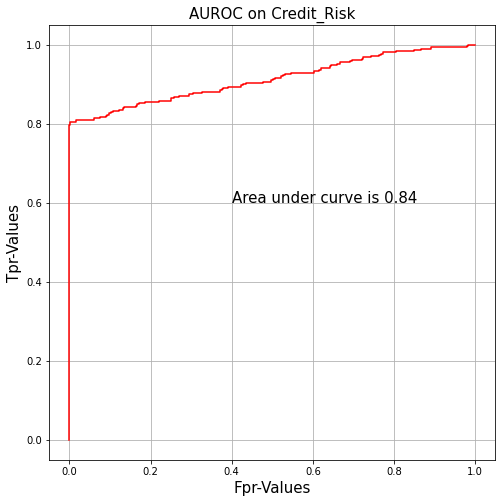

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Credit_Risk", size = 15)


## solve class imbalance problem

In [ ]:

x = pd.concat([train_x, train_y], axis=1)
print(x.shape)
x.head(1)

(598978, 30)


,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_int,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,default_ind
0,5000.0,0,1,5,24000.0,2,0,1,3,27.65,0.0,263,1.0,34.149943,3.0,0.0,83.7,9.0,0,5861.071414,861.07,171.62,0,41,0.0,0,0.0,225.412882,139766.247529,0


In [ ]:
x.default_ind.unique()

array([0, 1])

In [ ]:
x_1 = x[x.default_ind == 1]
x_0 = x[x.default_ind == 0]
print(x_1.shape, x_0.shape)

(46156, 30) (552822, 30)


since x_1 is less we will increase its record


In [ ]:
from sklearn.utils import resample
x_1_upsampled = resample(x_1, 
                              replace = True, # sample with replacement
                              n_samples=len(x_0), # match no. with majority
                              random_state=23) # reproducible result

In [ ]:
x_1_upsampled.default_ind.value_counts()

1    552822
Name: default_ind, dtype: int64

In [ ]:
train_upsampled = pd.concat([x_0, x_1_upsampled])

In [ ]:
train_upsampled.default_ind.value_counts()

1    552822
0    552822
Name: default_ind, dtype: int64

In [ ]:
train_x=train_upsampled.iloc[:,0:29]
train_y=train_upsampled.iloc[:,29]

In [ ]:
train_y.head()

0    0
2    0
3    0
4    0
5    0
Name: default_ind, dtype: int64

## Rebuild logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import confusion_matrix
lr.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = lr.predict(test_x)

In [ ]:
tab = confusion_matrix(pred, test_y)
tab

array([[ 16078,      9],
       [240602,    302]])

In [ ]:
acc = tab.diagonal().sum()/tab.sum() * 100
acc

6.373764061776482

In [ ]:
pred_prob = lr.predict_proba(test_x)
pred_prob = pd.DataFrame(pred_prob)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
fpr, tpr, threshold = roc_curve( test_y ,  pred_prob.iloc[:,1] )

Text(0.5, 1.0, 'AUROC on Credit_Risk')

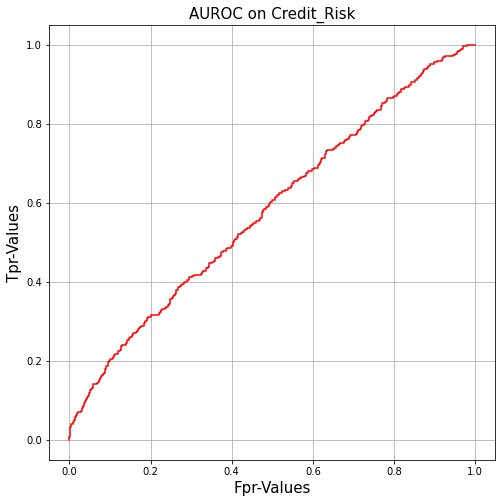

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
plt.plot(fpr,tpr, color = "r")
plt.xlabel("Fpr-Values", size = 15)
plt.ylabel("Tpr-Values", size = 15 )
plt.grid()
plt.title("AUROC on Credit_Risk", size = 15)

## Random classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()


In [ ]:
rfc.fit(train_x, train_y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rfc = rfc.predict(test_x)


In [ ]:
tab_rfc = confusion_matrix(pred_rfc, test_y)
tab_rfc

array([[105295,      9],
       [151385,    302]])

In [ ]:
rfc.feature_importances_
variable_importance = pd.DataFrame({"Features": train_x.columns,
                                   "Importance": rfc.feature_importances_})
variable_importance.sort_values('Importance', ascending=False)

,Features,Importance
21,last_pymnt_amnt,1.875016e-01
23,last_credit_pull_d,1.493189e-01
19,total_pymnt,1.277728e-01
20,total_rec_int,6.090343e-02
0,loan_amnt,5.994089e-02
28,tot_cur_bal,4.173196e-02
16,revol_util,3.594087e-02
4,annual_inc,3.572498e-02
9,dti,3.495057e-02
11,earliest_cr_line,3.052292e-02


In [ ]:
acc = tab.diagonal().sum()/tab.sum() * 100
acc

6.373764061776482

## Decision tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt_ctg = DecisionTreeClassifier(class_weight= "balanced")


In [ ]:
dt_ctg.fit(train_x, train_y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
pred_ctg = dt_ctg.predict(test_x)
tab_ctg = confusion_matrix(pred_ctg, test_y)
tab_ctg

array([[ 67302,      9],
       [189378,    302]])

In [ ]:
acc = tab_ctg.diagonal().sum()/tab.sum() * 100
acc

26.30597958683378

## cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
dt = DecisionTreeClassifier()
scores_dt = cross_val_score(dt, train_x, train_y, scoring='accuracy',cv=7)

In [ ]:
scores_dt.mean() #mean accuracy

0.9416665445629083

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
search_dict = {"criterion" :["gini" , "entropy"],
"max_depth" : range(3,10),
"min_samples_split" :range(25,50) }

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(dt , param_grid = search_dict)

In [ ]:
grid.fit(train_x , train_y)

In [ ]:
grid.best_params_

In [ ]:
pred_grid = grid.predict(test_x)

In [ ]:
tab_grid = confusion_matrix(pred_grid, test_y)
acc_grid = tab_grid.diagonal().sum() / tab_grid.sum()
acc_grid